In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import optimize
import curveball
import seaborn as sns
sns.set_style('ticks')
sns.set_context('notebook', font_scale=1.3)

# OD calibration

In [3]:
fn = r"../../data/dorith/OD_calibration/OD_calibration.tsv"

In [4]:
data = pd.read_csv(fn, sep='\t')
data.head()

,read,real
0,0.069214,0.076677
1,0.101426,0.095992
2,0.121221,0.112227
3,0.128326,0.153355
4,0.157464,0.165252


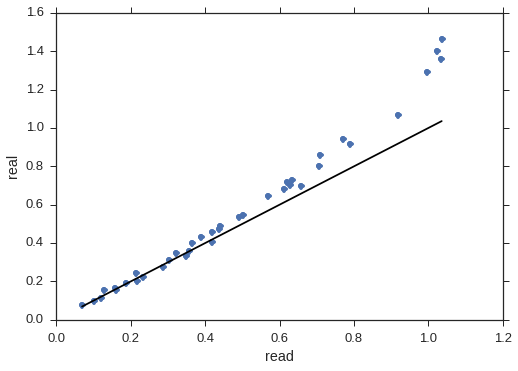

In [16]:
plt.plot(data['read'], data['real'], 'o')
plt.plot(data['read'], data['read'], 'k')
plt.xlabel('read')
plt.ylabel('real');

In [37]:
n = len(data['real'])

coefs2 = np.polyfit(data['read'], data['real'], 2)
f2 = np.poly1d(coefs2)
chisqr2 =  ((f2(data['read']) - data['read'])**2).sum()
bic2 = n * np.log(chisqr2 / n) + len(coefs2) * np.log(n)

coefs3 = np.polyfit(data['read'], data['real'], 3)
f3 = np.poly1d(coefs3)
chisqr3 =  ((f3(data['read']) - data['read'])**2).sum()
bic3 = n * np.log(chisqr3 / n) + len(coefs3) * np.log(n)

coefs4 = np.polyfit(data['read'], data['real'], 4)
f4 = np.poly1d(coefs4)
chisqr4 =  ((f4(data['read']) - data['read'])**2).sum()
bic4 = n * np.log(chisqr4 / n) + len(coefs4) * np.log(n)

coefs12 = np.polyfit(data['read'], data['real'], 12)
f12 = np.poly1d(coefs12)
chisqr12 =  ((f12(data['read']) - data['read'])**2).sum()
bic12 = n * np.log(chisqr12 / n) + len(coefs12) * np.log(n)


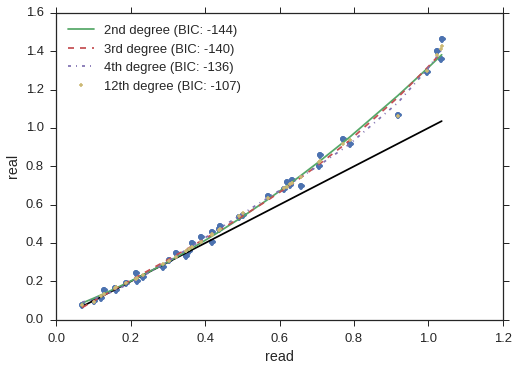

In [40]:
plt.plot(data['read'], data['real'], 'o')
plt.plot(data['read'], data['read'], 'k')
plt.plot(data['read'], f2(data['read']), label="2nd degree (BIC: %d)" % bic2)
plt.plot(data['read'], f3(data['read']), '--', label="3rd degree (BIC: %d)" % bic3)
plt.plot(data['read'], f4(data['read']), '-.', label="4th degree (BIC: %d)" % bic4)
plt.plot(data['read'], f12(data['read']), '.', label="12th degree (BIC: %d)" % bic12)

plt.xlabel('read')
plt.ylabel('real')
plt.legend(loc='upper left');

The 2nd degree polynomial has the lowest BIC and therefore is chosen.

In [30]:
recalibrate = f2
print coefs2

[ 0.55047143  0.73124464  0.03360131]


## Re-calibrate data

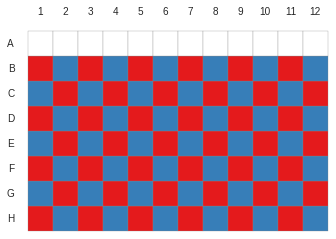

In [8]:
plate = pd.read_csv('../plate_templates/checkerboard.csv')
curveball.plots.plot_plate(plate);

In [9]:
folder = "../../data/dorith/"
fn = "06_09_14_hsp_ypd_ans_20140901merge/plate_16_OD"
df = curveball.ioutils.read_tecan_mat(folder + fn, plate=plate)
df.head()

,Cycle Nr.,Time,Well,OD,Row,Col,Strain,Color
0,1,0.000000,A1,0.0791,A,1,0,#ffffff
1,2,0.999722,A1,0.0789,A,1,0,#ffffff
2,3,1.999167,A1,0.0788,A,1,0,#ffffff
3,4,2.999444,A1,0.0799,A,1,0,#ffffff
4,5,3.999167,A1,0.0776,A,1,0,#ffffff


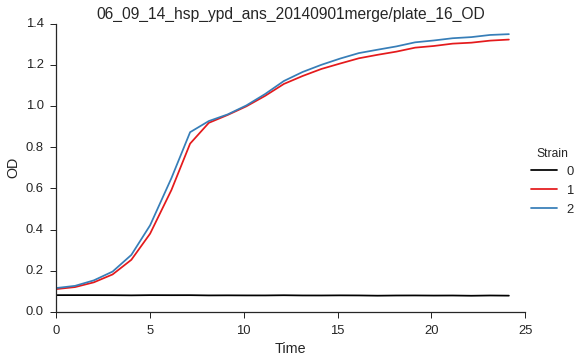

In [20]:
g = curveball.plots.plot_strains(df)
g.axes[0,0].set_title(fn);

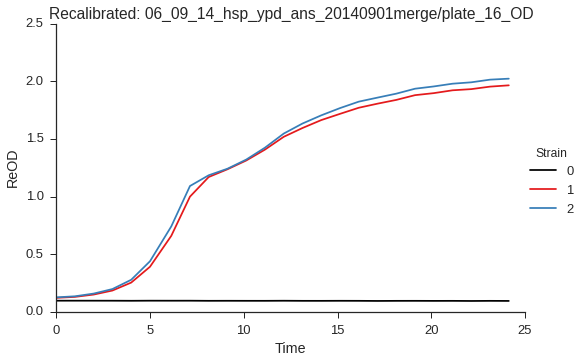

In [21]:
df['ReOD'] = recalibrate(df['OD'])
g = curveball.plots.plot_strains(df, y='ReOD')
g.axes[0,0].set_title("Recalibrated: " + fn);

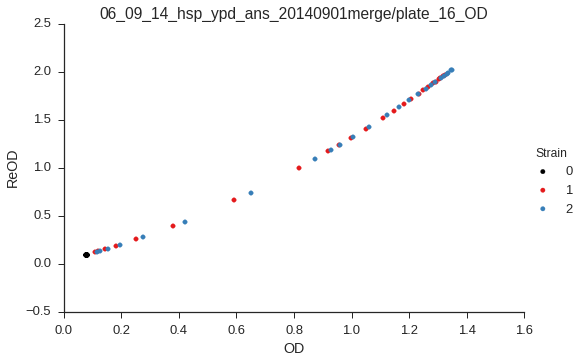

In [31]:
df['ReOD'] = recalibrate(df['OD'])
g = curveball.plots.plot_strains(df, x='OD', y='ReOD', plot_func=plt.scatter)
g.axes[0,0].set_title(fn);